In [44]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import statsmodels.formula.api as smf
import statsmodels as sm
s = json.load( open(os.getenv ('PUI2015')+"/PUI2015_fbianco/fbb_matplotlibrc.json"))
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [3]:
bsize = gp.GeoDataFrame.from_file("MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135ec7810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1307c2110>]], dtype=object)

/Users/tianyigu/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


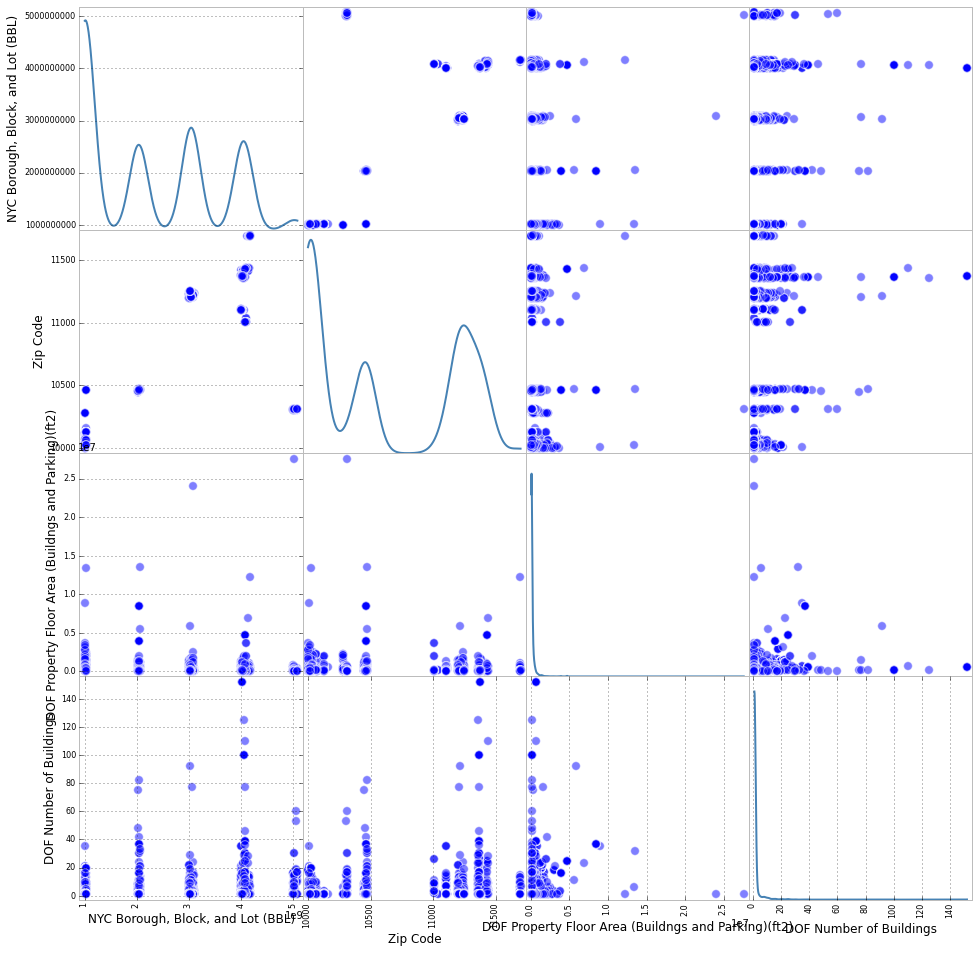

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [5]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    

In [6]:
indx1 = np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)'])
indx2 = np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'])

In [8]:
nrg['Site EUI(kBtu/ft2)'][indx1==0]=float('NaN')
nrg['Reported Property Floor Area (Building(s)) (ft²)'][indx2==0]=float('NaN')

/Users/tianyigu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/tianyigu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'].astype(float)
print bsize.BBL.astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [14]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']
bblnrgdata = pd.merge(nrg,bsize,on=['BBL'])

/Users/tianyigu/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1840: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/Users/tianyigu/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1116: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [25]:
bblnrgdata['TOT_EN'] = bblnrgdata['Site EUI(kBtu/ft2)'].astype(
    float) * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

/Users/tianyigu/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1692: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


In [38]:
BBLN = bblnrgdata[((bblnrgdata['TOT_EN']>1000) & (bblnrgdata['TOT_EN']<2e8) ) & ((bblnrgdata['UnitsTotal'] < 600)&((bblnrgdata['UnitsTotal'] > 10)))]
BBL = BBLN[['TOT_EN','UnitsTotal']]

(-9418174.9226448126,
 197899241.3226448,
 -18.30436393911738,
 626.30436393911725)

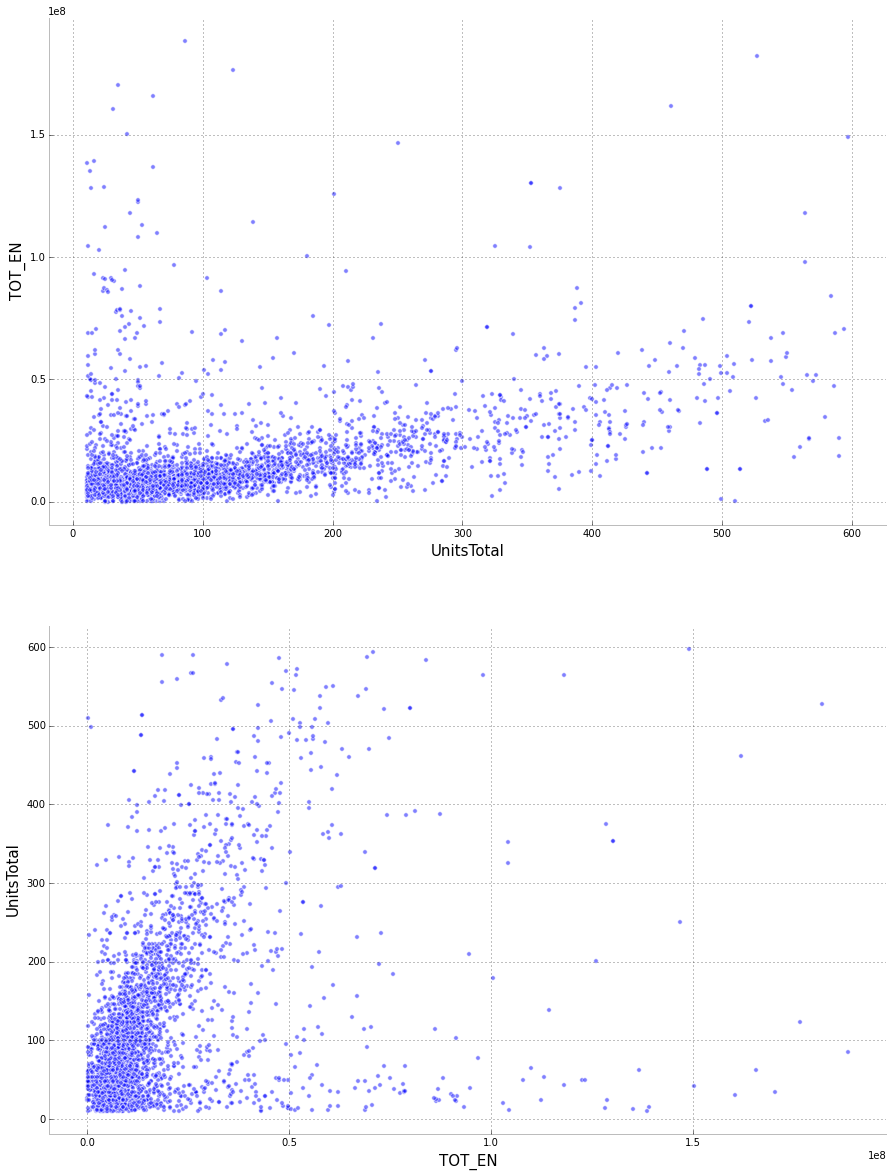

In [42]:
f = plt.figure(figsize=(15,20))
ax1 = plt.subplot(2,1,1) 
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False) 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('UnitsTotal',fontsize=15)
plt.ylabel('TOT_EN',fontsize=15)
plt.scatter(BBL['UnitsTotal'],BBL['TOT_EN'],alpha=0.5)
plt.axis('tight')

ax1 = plt.subplot(2,1,2) 
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False) 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('TOT_EN',fontsize=15)
plt.ylabel('UnitsTotal',fontsize=15)
plt.scatter(BBL['TOT_EN'],BBL['UnitsTotal'],alpha=0.5)
plt.axis('tight')

In [48]:
BBL = np.log10( BBL)

In [73]:
mod = smf.ols(formula='UnitsTotal ~ TOT_EN', data = BBL).fit()
mod1 = smf.ols(formula='TOT_EN ~ UnitsTotal', data = BBL).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     972.9
Date:                Sat, 17 Oct 2015   Prob (F-statistic):          7.57e-192
Time:                        19:28:18   Log-Likelihood:                -1367.1
No. Observations:                4103   AIC:                             2738.
Df Residuals:                    4101   BIC:                             2751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.1143      0.096    -11.594      0.000        -1.303    -0.926
TOT_EN         0.4283      0.014     31.191      0.000         0.401     0.455
==============================================================================
Omnibus:                      210.493   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.617
Skew:                          -0.562   Prob(JB):                     4.62e-54
Kurtosis:                       3.417   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOT_EN   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     972.9
Date:                Sat, 17 Oct 2015   Prob (F-statistic):          7.57e-192
Time:                        19:28:21   Log-Likelihood:                -1457.5
No. Observations:                4103   AIC:                             2919.
Df Residuals:                    4101   BIC:                             2932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1473      0.028    223.520      0.000         6.093     6.201
UnitsTotal     0.4476      0.014     31.191      0.000         0.420     0.476
==============================================================================
Omnibus:                      577.231   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6600.771
Skew:                          -0.251   Prob(JB):                         0.00
Kurtosis:                       9.193   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
mod1 = smf.ols(formula='TOT_EN ~ UnitsTotal', data = BBL).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOT_EN   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     972.9
Date:                Sat, 17 Oct 2015   Prob (F-statistic):          7.57e-192
Time:                        18:36:45   Log-Likelihood:                -1457.5
No. Observations:                4103   AIC:                             2919.
Df Residuals:                    4101   BIC:                             2932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1473      0.028    223.520      0.000         6.093     6.201
UnitsTotal     0.4476      0.014     31.191      0.000         0.420     0.476
==============================================================================
Omnibus:                      577.231   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6600.771
Skew:                          -0.251   Prob(JB):                         0.00
Kurtosis:                       9.193   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

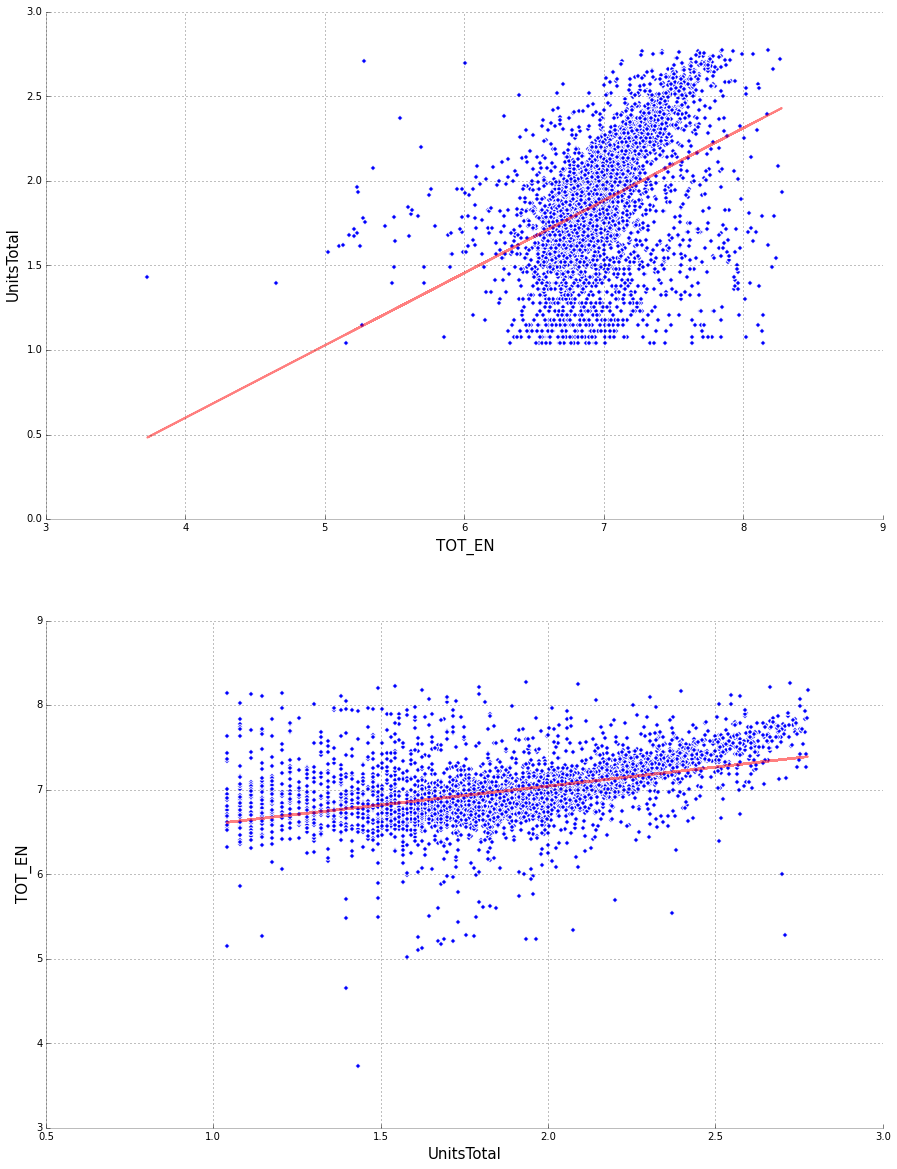

In [57]:
f = plt.figure(figsize=(15,20))
ax1 = plt.subplot(2,1,1) 
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False)
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('TOT_EN',fontsize=15)
plt.ylabel('UnitsTotal',fontsize=15)
plt.scatter(BBL['TOT_EN'], BBL['UnitsTotal'])
plt.plot(BBL['TOT_EN'], mod.predict(),color='red',alpha=0.5)

f = plt.figure(figsize=(15,20))
ax3 = plt.subplot(1,1,1)
ax3.spines["top"].set_visible(False)  ## set the top frame invisible
ax3.spines["right"].set_visible(False) ## set the right frame invisible
ax3.get_xaxis().tick_bottom()  
ax3.get_yaxis().tick_left()  
plt.xlabel('UnitsTotal',fontsize=15)
plt.ylabel('EnergyTotal',fontsize=15)
x = np.linspace(min(lr_bbl['UnitsTotal']), max(lr_bbl['UnitsTotal']), 100)
xpd = pd.DataFrame({'UnitsTotal':x})
plt.scatter(lr_bbl['UnitsTotal'], lr_bbl['EnergyTotal'])
plt.plot(xpd, mod3.predict(xpd), color='red',alpha=0.6)

ax2 = plt.subplot(2,1,2) 
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False) 
ax2.get_xaxis().tick_bottom()  
ax2.get_yaxis().tick_left()  
plt.xlabel('UnitsTotal',fontsize=15)
plt.ylabel('TOT_EN',fontsize=15)
plt.scatter(BBL['UnitsTotal'], BBL['TOT_EN'])
plt.plot(BBL['UnitsTotal'], mod1.predict(), color='red',alpha=0.5)

# look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

The second one is better.


Can't do a likrelihood ratio test here because the two variables are independent.

now fit a second degree curve to it: ax^2+bx+c.
that is still called a linear fir by the way, the "linear" definition refers to the PARAMETERS being linear, not to the variable! you can use np.polyfit for example (an example showned in the other assignment notebook), with order 2 instead of 1,
np.polyfit(x, y, 2)
or statmodels.formula.api passing a formula like
formula = 'y ~ 1 + x + I(x ^ 2.0)'
look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

In [75]:
mod2 = smf.ols(formula='TOT_EN ~ 1 + UnitsTotal + I(UnitsTotal**2.0)', data = BBL).fit()
mod3 = smf.ols(formula='UnitsTotal ~ 1 + TOT_EN + I(UnitsTotal**2.0)', data = BBL).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOT_EN   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     758.9
Date:                Sat, 17 Oct 2015   Prob (F-statistic):          3.95e-281
Time:                        19:28:53   Log-Likelihood:                -1248.1
No. Observations:                4103   AIC:                             2502.
Df Residuals:                    4100   BIC:                             2521.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                8.1718      0.100     81.779      0.000         7.976     8.368
UnitsTotal              -1.7964      0.108    -16.668      0.000        -2.008    -1.585
I(UnitsTotal ** 2.0)     0.5970      0.028     20.990      0.000         0.541     0.653
==============================================================================
Omnibus:                      758.135   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10623.977
Skew:                          -0.461   Prob(JB):                         0.00
Kurtosis:                      10.829   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.346e+05
Date:                Sat, 17 Oct 2015   Prob (F-statistic):               0.00
Time:                        19:29:00   Log-Likelihood:                 6811.9
No. Observations:                4103   AIC:                        -1.362e+04
Df Residuals:                    4100   BIC:                        -1.360e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                1.1483      0.014     82.207      0.000         1.121     1.176
TOT_EN                  -0.0353      0.002    -16.668      0.000        -0.039    -0.031
I(UnitsTotal ** 2.0)     0.2663      0.001    465.648      0.000         0.265     0.267
==============================================================================
Omnibus:                     1089.345   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2301.467
Skew:                          -1.564   Prob(JB):                         0.00
Kurtosis:                       4.918   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

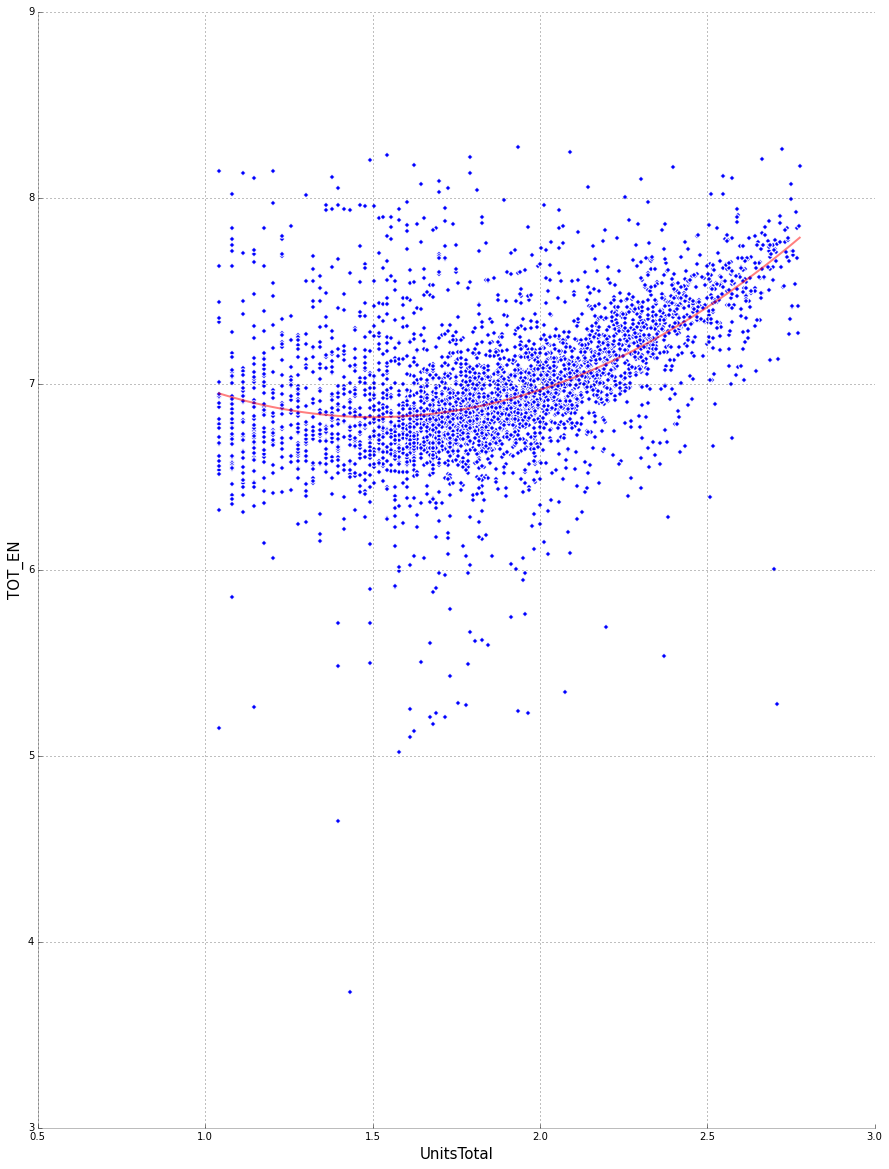

In [93]:
f = plt.figure(figsize=(15,20))
ax3 = plt.subplot(1,1,1)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False) 
ax3.get_xaxis().tick_bottom()  
ax3.get_yaxis().tick_left()  
plt.xlabel('UnitsTotal',fontsize=15)
plt.ylabel('TOT_EN',fontsize=15)
x = np.linspace(min(BBL['UnitsTotal']), max(BBL['UnitsTotal']), 100)
xpd = pd.DataFrame({'UnitsTotal':x})
plt.scatter(BBL['UnitsTotal'], BBL['TOT_EN'])
plt.plot(xpd, mod2.predict(xpd), color='red',alpha=0.5)

# look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

The polyfit model is better.

We can do the likelihood ratio test because the degree of freedom is different between two diiferent models